# 1.  Habilitar Google drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 2.   Importar librerías


# Aplicar clasificador_Haar de caras frontales


In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# 3.   Cargar clasificador Haar


In [0]:
face_cascade= cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml');


#4.  Cargar imagen  desde Google Drive

In [0]:
img = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/caras.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# 5. Identificar rostros en la imagen (detectMultiScale)


In [9]:
faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30))
print(faces)


[[252  41  73  73]
 [153  43  91  91]
 [323  45  83  83]
 [  3  55  68  68]
 [ 72  51  94  94]
 [400  63  80  80]
 [474  78  86  86]
 [565  83  73  73]]


# 6.  Dibujamos rectángulos de colores correspondientes a la matriz

In [0]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
cv2_imshow(img)  


#

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml');
img = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/caras.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.3,2);
print(faces)
idx=0
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  idx += 1
  cv2.putText(img,"Cara #{}".format(idx),(x,y-10),
  cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0),1)
cv2_imshow(img)
cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/caras_detectadas.jpg',img)


# Realizar detecciones en un video o una cámara web
# Clasificador_Haar en un video o cámara web


# 0.   Ver video en Google colaboratory


In [11]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/My Drive/IA/Computer_Vision/Images/familia_cantando.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


Output hidden; open in https://colab.research.google.com to view.

# 1.   Cargar video de Google drive con opencv


In [0]:
videoentrada = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_Vision/Images/familia_cantando.mp4')


# 2.  Conociendo sus características 


In [111]:
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
totalframes = int(cv2.VideoCapture.get(videoentrada, property_id))
print( "total de frames: "+str(totalframes) )
print(str(videoentrada.get(3))+"x"+str(videoentrada.get(4))+" pixeles")


total de frames: 1412
640.0x360.0 pixeles


2.1. extrayendo solo unos frames


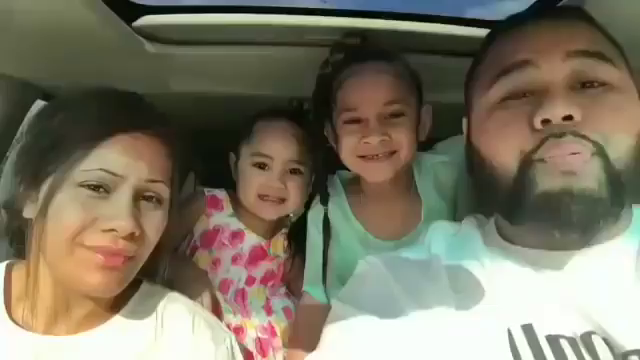

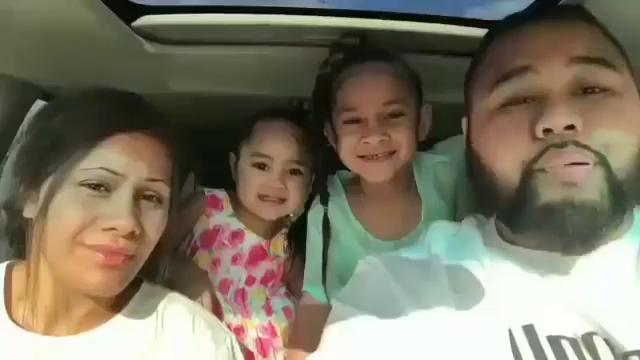

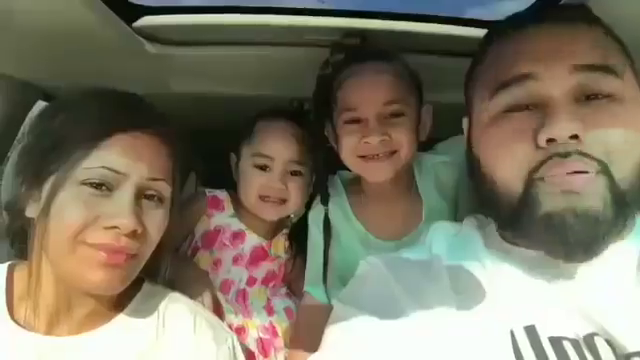

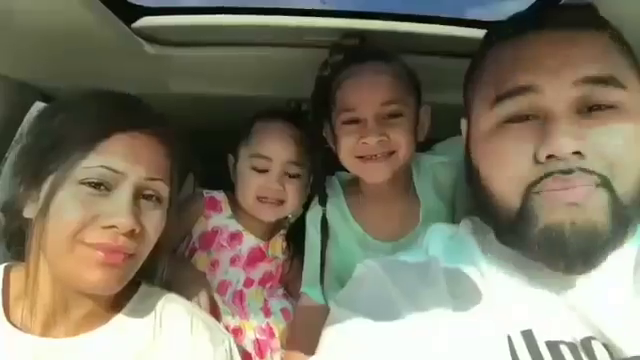

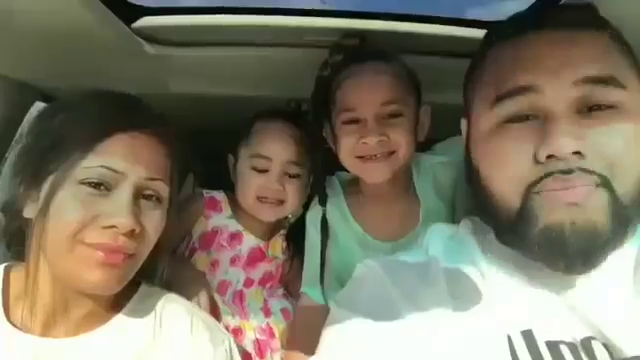

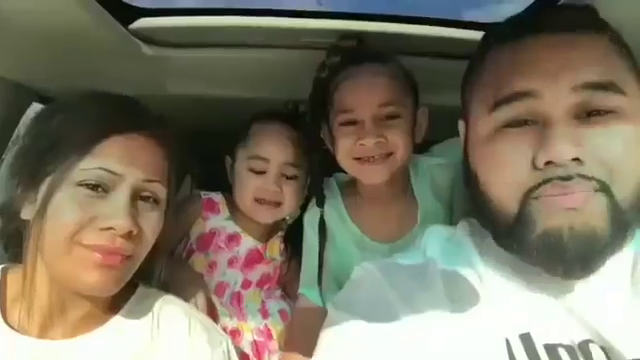

In [112]:
#recorremos los 6 primeros frames de 1412
for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  cv2_imshow(frame)


2.2. Recorriendo todo el video (No ejecutar)


In [0]:
while(videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    # Nuestras operaciones sobre los frames se hacen aqui
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  else:
    break  
videoentrada.release()


3.   Aplicar filtro gris a cada frame del video


In [0]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


4.   Aplicar clasificador al frame


In [0]:
faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)


5.   Capturar cada frame del video


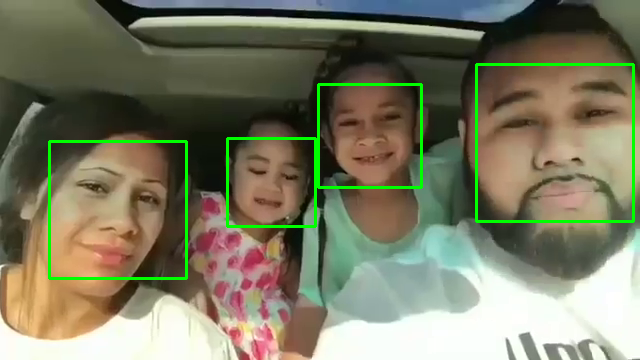

In [115]:
for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2_imshow(frame)



6.   Aplicando todo


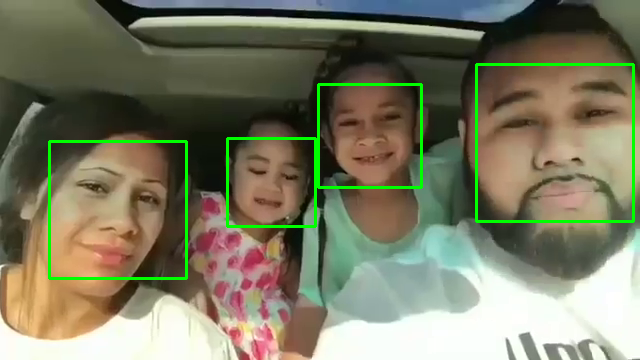

In [116]:
for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2_imshow(frame)



7. Aplicando todo

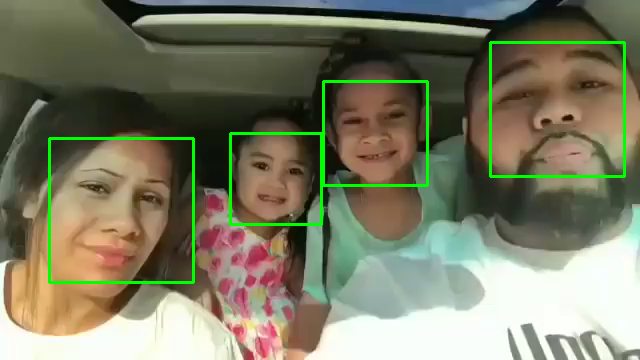

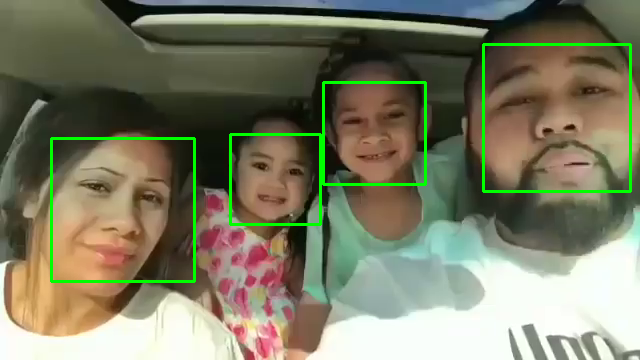

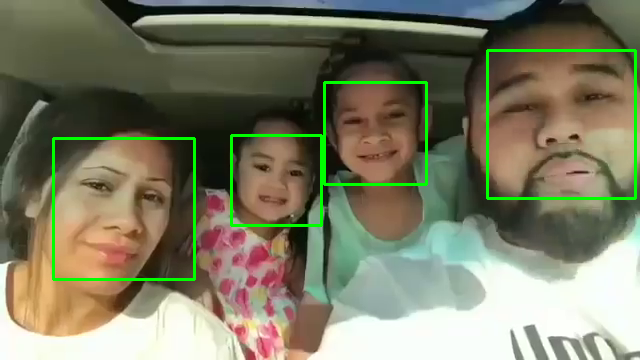

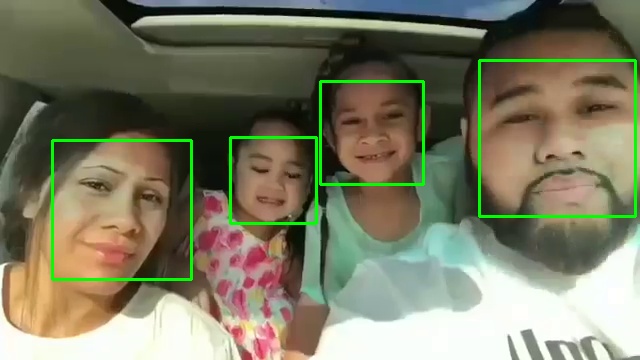

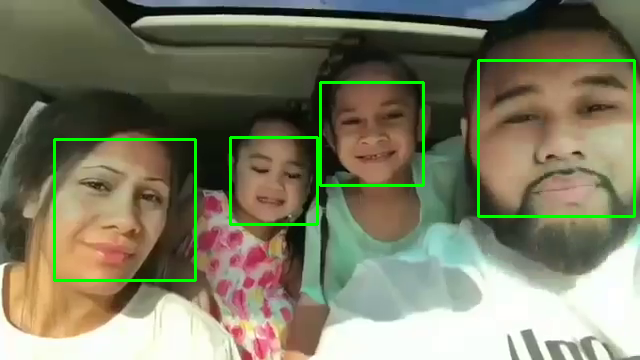

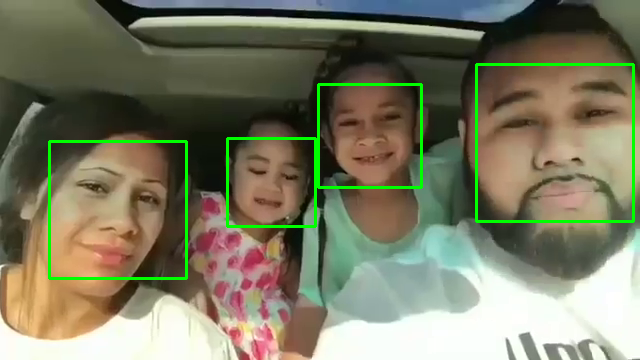

In [118]:
#video que vamos a analizar
video = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_Vision/Images/familia_cantando.mp4')
#clasificador haar
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml')

for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  #convertimos el frame a gris
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #detectamos las caras en el frame
  faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
  for (x, y, w, h) in faces:
    #dibujamos rectángulos verdes alrededor de las caras
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
  cv2_imshow(frame)


# Instalar libreria para medir la ejecución


In [120]:
pip install pyprind

In [0]:
import sys
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import pyprind
#funcion para ver el avance de procesos en background
def reporthook(step, total_step):
    global start_time
    if step == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    speed = total_step / (1024.**2 * duration)
    percent = step *100 /total_step
    sys.stdout.write("\r%d pasos | %d frames -> %%.2f frames | %d segundos transcurrido" %
                    (step, percent, duration))
    sys.stdout.flush()


In [123]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml')
#video que analizaremos
videoentrada = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_Vision/Images/familia_cantando.mp4')
#video resultante del análisis, definimos el codec DIVX
codec = cv2.VideoWriter_fourcc(*'DIVX')
# Definimos el fps = 20.0 y el tamaño de cada frame (640x360)
videosalida = cv2.VideoWriter('/content/drive/My Drive/IA/Computer_Vision/Images/familia_cantando_haar2.avi',
                              codec, 20.0,(640,360))
framenum=0
while (videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    videosalida.write(frame)
    reporthook(framenum, 1412)
    framenum=framenum+1
  else: break
videoentrada.release()
videosalida.release()


1411 pasos | 99 frames -> %.2f frames | 234 segundos transcurrido

# Ojos y sonrisa

[[250 165  89  89]
 [124 201  72  72]]


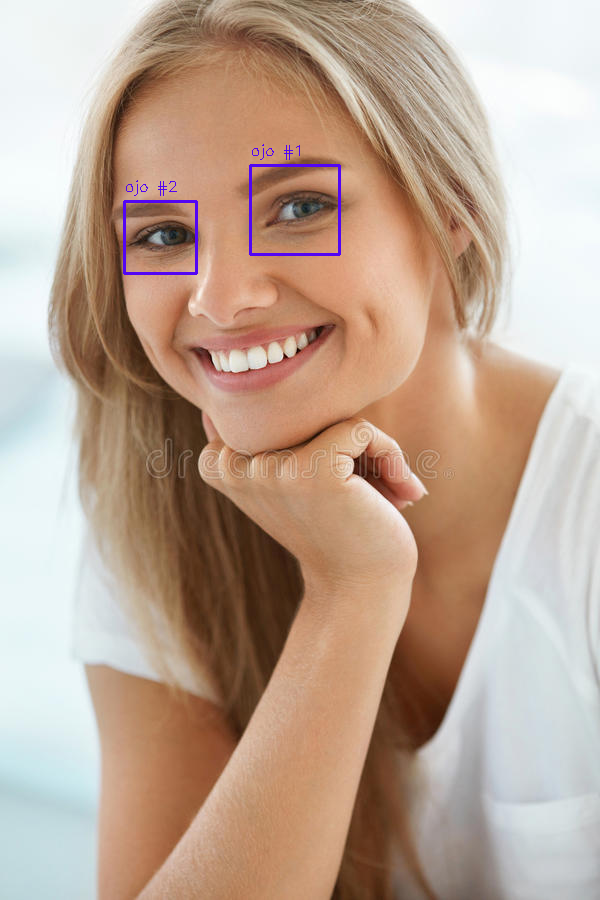

True

In [99]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_eye.xml');
img = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/ojos_y_sonrisa.jpg")
#img = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/ojos_y_sonrisa.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.3,25);
print(faces)
idx=0
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(244, 5, 82),2)
  idx += 1
  cv2.putText(img,"ojo #{}".format(idx),(x,y-10),
  cv2.FONT_HERSHEY_SIMPLEX,.5,(244, 5, 82),1)
  #cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0),1)
cv2_imshow(img)
cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/ojos_detectados.jpg',img)

[[161 312 180  90]]


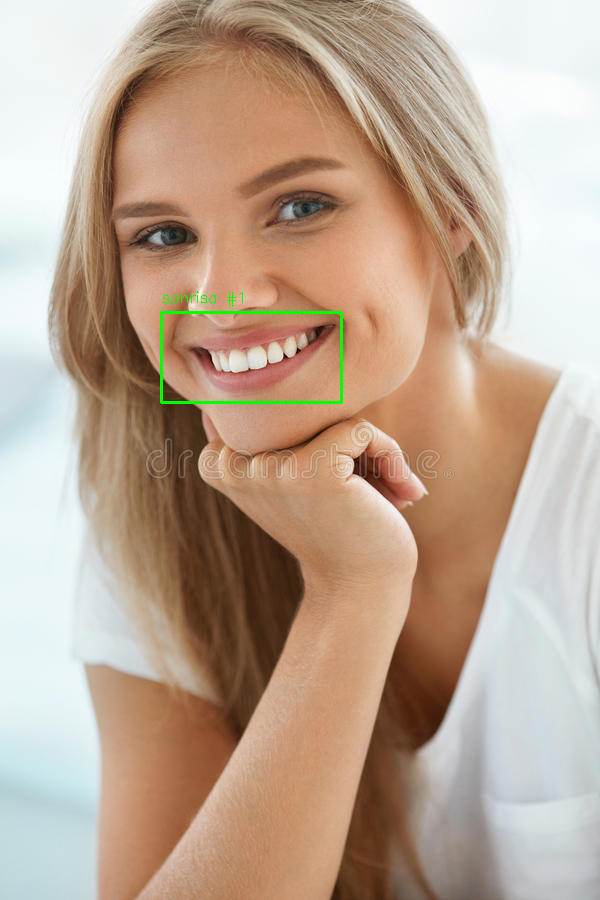

In [90]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_smile.xml');
img = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/ojos_y_sonrisa.jpg")
#img = cv2.imread("/content/drive/My Drive/IA/Computer_Vision/Images/ojos_y_sonrisa.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.3,25);
print(faces)
idx=0
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  idx += 1
  cv2.putText(img,"sonrisa #{}".format(idx),(x,y-10),
  cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0),1)
cv2_imshow(img)
#cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/sonrisa_detectada.jpg',img)